In [3]:
import pandas as pd
import pastas as ps

Numba is not installed. Installing Numba is recommended for significant speed-ups.
Numba is not installed. Installing Numba is recommended for significant speed-ups.
Numba is not installed. Installing Numba is recommended for significant speed-ups.
Numba is not installed. Installing Numba is recommended for significant speed-ups.
Numba is not installed. Installing Numba is recommended for significant speed-ups.
Numba is not installed. Installing Numba is recommended for significant speed-ups.


In [53]:
df = pd.read_pickle('data/kaggle-preprocessed/aquifer_auser.pkl')
df.describe()

,rainfall_gallicano,rainfall_pontetetto,rainfall_monte_serra,rainfall_orentano,rainfall_borgo_a_mozzano,rainfall_piaggione,rainfall_calavorno,rainfall_croce_arcana,rainfall_tereglio_coreglia_antelminelli,rainfall_fabbriche_di_vallico,...,volume_cc2,volume_csa,volume_csal,hydrometry_monte_s_quirico,hydrometry_piaggione,year,month,week,day,day_of_year
count,5295.000000,5295.000000,5289.000000,5295.000000,5295.000000,4930.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,5660.000000,5660.000000,5660.000000,7241.000000,6119.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,4.948782,3.495449,3.919077,3.150670,4.578961,3.953976,4.578886,2.849745,4.182927,5.922304,...,-11808.085531,-2352.562424,-1985.775034,0.313618,-0.209204,2008.837503,6.493991,26.473142,15.737307,182.236571
std,14.366480,9.983772,10.815270,8.747507,12.771166,10.888103,12.461918,9.239679,11.135511,16.281733,...,1444.085240,2854.176875,2534.301154,0.213851,0.849013,6.453598,3.434663,14.998657,8.798320,104.996348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-14438.304000,-7757.258065,-9497.774194,0.000000,-1.190000,1998.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12769.920000,-5493.709677,-4354.392857,0.160000,-1.000000,2003.000000,4.000000,14.000000,8.000000,92.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12078.720000,0.000000,0.000000,0.260000,-0.280000,2009.000000,6.000000,26.000000,16.000000,180.500000
75%,2.000000,1.000000,1.600000,1.000000,2.000000,1.400000,2.000000,1.400000,2.000000,3.000000,...,-11015.136000,0.000000,0.000000,0.400000,0.580000,2014.000000,9.000000,39.000000,23.000000,273.000000
max,318.800000,146.600000,152.200000,108.800000,176.600000,140.800000,209.000000,285.000000,147.200000,197.000000,...,-5569.298387,0.000000,0.000000,2.170000,3.690000,2020.000000,12.000000,53.000000,31.000000,366.000000


In [54]:
df.columns

Index(['rainfall_gallicano', 'rainfall_pontetetto', 'rainfall_monte_serra',
       'rainfall_orentano', 'rainfall_borgo_a_mozzano', 'rainfall_piaggione',
       'rainfall_calavorno', 'rainfall_croce_arcana',
       'rainfall_tereglio_coreglia_antelminelli',
       'rainfall_fabbriche_di_vallico', 'target_depth_to_groundwater_lt2',
       'target_depth_to_groundwater_sal', 'depth_to_groundwater_pag',
       'depth_to_groundwater_cos', 'depth_to_groundwater_diec',
       'temperature_orentano', 'temperature_monte_serra',
       'temperature_ponte_a_moriano', 'temperature_lucca_orto_botanico',
       'volume_pol', 'volume_cc1', 'volume_cc2', 'volume_csa', 'volume_csal',
       'hydrometry_monte_s_quirico', 'hydrometry_piaggione', 'year', 'month',
       'week', 'day', 'day_of_year'],
      dtype='object')

In [55]:
ho = df['target_depth_to_groundwater_sal'] # groundwater level
ho = ho[ho != 0]

E0 = (700 Tm / (100 - A) + 15 (T-Td)) / (80-T) {mm/day}, T is mean temperature, A is the latitude (degrees) and Td is the mean dew-point
where Tm = T + 0.006h, h is elevation (metres)

In [59]:
meteo = pd.read_pickle('data/nasa-power/calavorno.pkl')
p = df['rainfall_calavorno']#meteo['PRECTOT'] # precipitation
T = meteo['T2M'] # mean temperature
Td = meteo['T2MDEW'] # mean dew point
h = 120 # elevation is about 900 meters above sea level
Tm = T + 0.006 * h
A = 43.75434 # latitude of monte serra
ev = (700 * Tm / (100 - A) + 15 * (T-Td)) / (80-T) # open water evaporation estimation of evaporation

INFO: Nan-values were removed at the start of the time series target_depth_to_groundwater_sal.
INFO: Cannot determine frequency of series target_depth_to_groundwater_sal: freq=None. The time series is irregular.
INFO: Time Series target_depth_to_groundwater_sal: 290 nan-value(s) was/were found and filled with: drop.
INFO: Nan-values were removed at the start of the time series rainfall_calavorno.
INFO: Inferred frequency for time series rainfall_calavorno: freq=D
INFO: Inferred frequency for time series None: freq=D
INFO: Time Series rainfall_calavorno was extended to 1997-04-08 00:00:00 with the mean value of the time series.
INFO: Time Series None was extended to 1997-04-08 00:00:00 with the mean value of the time series.


Fit report target_depth_t                         Fit Statistics
nfev     13                     EVP                           65.31
nobs     4535                   R2                             0.65
noise    False                  RMSE                           0.35
tmin     2007-04-06 00:00:00    AIC                             nan
tmax     2020-06-30 00:00:00    BIC                             nan
freq     D                      Obj                          270.62
warmup   3650 days 00:00:00     ___                                
solver   LeastSquares           Interpolated                     No

Parameters (5 were optimized)
                 optimal                    stderr    initial  vary
rainevap_A  2.651081e-01                    ±2.14%   0.075279  True
rainevap_n  8.802195e-01                    ±1.75%   1.000000  True
rainevap_a  1.035876e+02                    ±4.36%  10.000000  True
rainevap_f -2.184172e-19  ±8803899961855712256.00%  -1.000000  True
constant_d -6.889640

,Value
Statistic,
rmse,0.345160
rmsn,NaN
sse,541.237723
mae,0.283537
nse,0.653129
evp,65.312899
rsq,0.652671
bic,29.510185
aic,-2.587717


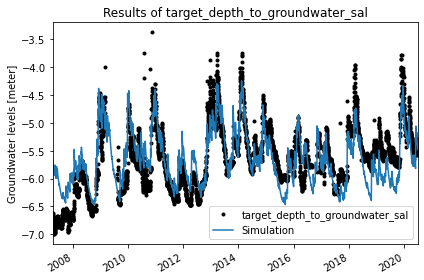

In [60]:
ml = ps.Model(ho)

ts = ps.StressModel2([p, ev], ps.Gamma, name='rainevap', settings=("prec", "evap"))
ml.add_stressmodel(ts)

# Solve the model
ml.solve(noise=False)

# Plot the results
ml.plot()

# Statistics
ml.stats.summary()

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:title={'left':'Model Parameters'}>,
 <AxesSubplot:title={'right':"Stresses: ['rainfall_calavorno', None]"}>,
 <AxesSubplot:xlabel='Time [days]'>]

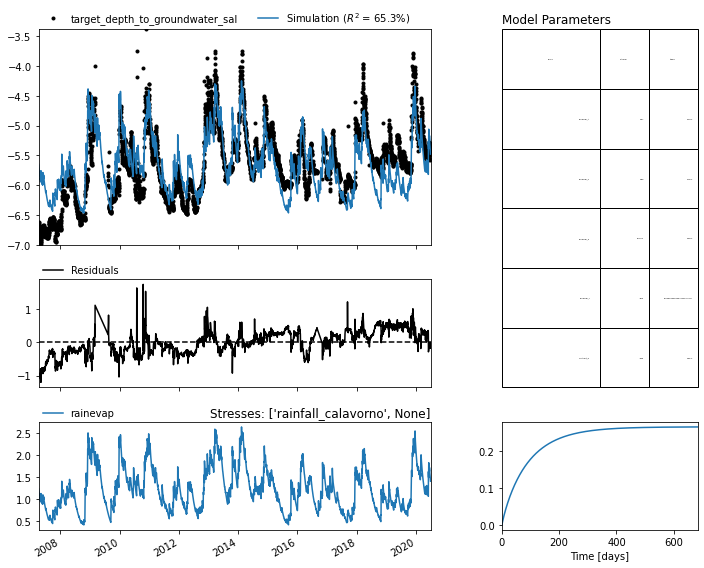

In [65]:
ml.plots.results()